# Módulo 1: Extracción de datos

## -- Shapefiles --

### Objetivo

- Entender qué contiene un SHP así como conceptos básicos de estos archivos.
  - Aprender la importancia de los CRS y cómo ésto nos puede ayudar a cuadrar mapas.
- Visualizar mapas a partir de una serie de puntos, líneas y polígonos.
- Graficar características del AMG (Área Metropolitana de Guadalajara).

### Actividades

#### Actividad de clase

- A partir de los archivos provistos de tren ligero del AMG y caminos, dibuje las líneas del tren así como el de los caminos del estado (gráficos separados).

#### Actividad de tarea

- Tome el archivo de colonias, lea y grafique coloreando por municipio.
  - El object type es `colonias`, estos files no tienen subcarpetas como los del tren.
- Sobre el archivo de colonias agregue lo ya hecho de líneas del tren ligero.
  - El objetivo de este punto es replicar la gráfica que ya existe de estaciones con nombres MÁS el plot de colonias.
  - Para que te sea más fácil pregúntate, ¿necesitas modificar algo del `for` para que esto funcione? Solo ten cuidado con que todo tenga el mismo `CRS` (El `CRS` indicado a utilizar es el `"EPSG:4326"`)
  - Recuerda que para modificar el `CRS` de algo que ya sea un mapa (o sea que ya cuente con un `CRS`) debes usar el `to_crs`.

Una excelente referencia: https://www.earthdatascience.org/workshops/gis-open-source-python/intro-vector-data-python/


Los archivos shapefile albergan vectores de información geoespacial generalmente utilizado en GIS (Geographic Information System).

## Tipos de información

- Puntos: Coordenadas x,y.
- Líneas: Conexiones de 2+ puntos.
- Polígonos: 3+ puntos que se conectan **y se cierran**.


## Estructura

- `.shp`: Contiene geometría para todos los features.
- `.shx`: Contiene los índices para toda la geometría.
- `.dbf`: Guarda metadatos en forma tabular.


## Metadata espacial

Los metadatos son _los datos de los datos_. Si yo descargo un archivo .csv, el peso del archivo es un metadato.

- `CRS`: Proyección de la data. Coordinate Reference System. Nos ayuda a proyectar una serie de coordenadas de manera que tengan sentido en un mapa. Ver: https://geopandas.org/projections.html
- `Extent`: Espacio geográfico que cubre todos los objetos dentro del archivo shapefile.


## Creando puntos, líneas y polígonos

Importante antes contar con la paquetería `shapely`, `geopandas` y `descartes` instaladas.


In [1]:
# Importamos los 3 objetos básicos
from shapely.geometry import Point, Polygon, LineString


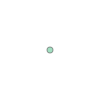

In [2]:
# Definiendo un punto
point1 = Point(0, 1)
point1

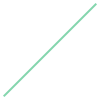

In [3]:
# Definiendo una línea
point1 = [0, 1]
point2 = [2, 3]

# Línea
linea = LineString([point1, point2])
linea

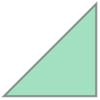

In [4]:
# Definiendo un polígono
point1 = [0, 0]
point2 = [1, 0]
point3 = [1, 1]

puntos_juntos = [point1, point2, point3]
poligono = Polygon(puntos_juntos)
poligono

## Leyendo shapefiles (.shp)

### Actividad de clase:

- A partir de los archivos provistos de tren ligero del AMG y caminos, dibuje las líneas del tren así como el de los caminos del estado (gráficos separados).


In [3]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [4]:
# supdir =  Reemplaza con el directorio donde vayas a trabajar. Aquí debe de estar un subdirectorio llamado "tren-ligero"
supdir = '.'

In [5]:
basedir = os.path.join(supdir, 'tren-ligero','tren_ligero-gdl')
directorio = os.path.join(basedir, 'lineas', 'c_tren_l1.shp')


mi_sh = gpd.read_file(directorio)
mi_sh.head()


,OID_,Name,FolderPath,geometry
0,0,Línea 1,SiteurLínea 1,"LINESTRING Z (666639.364 2279504.599 0, 667183..."


Dada la forma en la que tenemos organizada la información (carpetas), crearemos una función para leer. El ejemplo es de las líneas del tren ligero.


In [8]:
def get_shp_files(basedir, object_type, file_type='.shp'):
    """ Lectura de archivos SHP anidados
    
    Este método nos permitirá leer archivos SHP que se encuetran en subcarpetas.
    
    Parámetros
    
    basedir: Directorio base en el cual se encuentran nuestras subcarpetas con archivos shp.
    object_type: Tipo de mapa a leer (las carpetas que descargamos traen muchos tipos dentro).
    file_type: Constante para solo leer archivos .shp
    """
    # Empezamos con el código diciéndonos qué rayos está leyendo
    print(f'--> Initiating with {file_type} file reading over {object_type} type of files.')
    
    # Juntamos el directorio original con el tipo de mapa a leer.
    final_dir = os.path.join(basedir, object_type)
    
    # Juntando todos los archivos del directorio
    existing_files = os.listdir(final_dir)
    
    # Variable respuesta, aquí tendremos todos los archivos
    returning_files = {}
    
    # Recorriendo archivo por archivo
    for existing_file in existing_files:

        # Condicional: ¿El archivo en cuestión es de los que nos interesan?
        if file_type in existing_file:

            # En efecto lo es, quítale la extensión ".shp"
            file_name = existing_file.strip(file_type)
            
            print(f'--> Found file {file_type}: {file_name}.')
                                            
            # Nuevo path: El específico para el archivo shp
            path_to_specific_file = os.path.join(final_dir, existing_file)
            
            # Leyéndolo con geopandas
            returning_files[file_name] = gpd.read_file(path_to_specific_file)
    
    # Listo
    print(f'Done with file seek over {object_type}.')
    return returning_files

supdir = '.'
basedir = os.path.join(supdir, 'tren-ligero', 'tren_ligero-gdl')

# Leer líneas y estaciones
lineas    = get_shp_files(basedir=basedir, object_type='lineas')
estaciones = get_shp_files(basedir=basedir, object_type='estaciones')

--> Initiating with .shp file reading over lineas type of files.
--> Found file .shp: c_tren_l1.
--> Found file .shp: c_tren_l2.
--> Found file .shp: c_tren_l3.
Done with file seek over lineas.
--> Initiating with .shp file reading over estaciones type of files.
--> Found file .shp: c_est_tren_l1.
--> Found file .shp: c_est_tren_l2.
--> Found file .shp: c_est_tren_l3.
Done with file seek over estaciones.


In [7]:
# Veamos qué tenemos
display(lineas['c_tren_l1'])
display(lineas['c_tren_l2'])

NameError: name 'lineas' is not defined

Parece que tenemos un ligero cochinero, pero accedamos al mismo archivo que leímos hace rato:


In [11]:
# Línea 1
estaciones_l1 = estaciones['c_est_tren_l1']
linea1 = lineas['c_tren_l1']
estaciones_l1

,Id,NOMBRE,Detalle,geometry
0,0,ESTACION PERIFERICO SUR,Superficie,POINT (666657.175 2279493.698)
1,0,ESTACION SANTUARIO MARTIRES DE CRISTO REY,Superficie,POINT (667186.342 2280225.007)
2,0,ESTACION ESPAÑA,Superficie,POINT (667826.635 2281080.936)
3,0,ESTACION PATRIA,Superficie,POINT (668284.365 2281674.927)
4,0,ESTACION ISLA RAZA,Superficie,POINT (668734.158 2282344.324)
5,0,ESTACION 18 DE MARZO,Superficie,POINT (669108.544 2282944.93)
6,0,ESTACION URDANETA,Superficie,POINT (669537.17 2283499.233)
7,0,ESTACION UNIDAD DEPORTIVA,Superficie,POINT (669910.233 2283974.161)
8,0,ESTACION SANTA FILOMENA,Superficie,POINT (670468.505 2284740.131)
9,0,ESTACION WASHINGTON,Subterranea,POINT (671109.396 2285500.647)


In [12]:
# Línea 2

In [13]:
# Ojo con como vienen los metadatos de la línea 3


Es exactamente lo mismo, solo nos ayudamos de la función para tener todo más organizado.

Sabemos que tenemos un diccionario de la forma:

```
dict = {nombre_archivo: geopandas con coordenadas}
```

Grafiquemos un solo set usando `geopandas`:


In [14]:
# Viendo como acceder a estaciones
estaciones_l1 = estaciones_l1.to_crs("EPSG:4326")
linea1 = linea1.to_crs("EPSG:4326")
estaciones_l1
# ¿Cómo se ven las estaciones?

,Id,NOMBRE,Detalle,geometry
0,0,ESTACION PERIFERICO SUR,Superficie,POINT (-103.40073 20.60719)
1,0,ESTACION SANTUARIO MARTIRES DE CRISTO REY,Superficie,POINT (-103.39559 20.61375)
2,0,ESTACION ESPAÑA,Superficie,POINT (-103.38936 20.62142)
3,0,ESTACION PATRIA,Superficie,POINT (-103.38492 20.62674)
4,0,ESTACION ISLA RAZA,Superficie,POINT (-103.38054 20.63275)
5,0,ESTACION 18 DE MARZO,Superficie,POINT (-103.37689 20.63814)
6,0,ESTACION URDANETA,Superficie,POINT (-103.37272 20.64311)
7,0,ESTACION UNIDAD DEPORTIVA,Superficie,POINT (-103.3691 20.64736)
8,0,ESTACION SANTA FILOMENA,Superficie,POINT (-103.36366 20.65423)
9,0,ESTACION WASHINGTON,Subterranea,POINT (-103.35744 20.66104)


In [15]:
# Graficando estaciones línea 1

Notamos que el CRS está raro (el estándar es 4326)


In [16]:
# Setteando CRS a algo típico

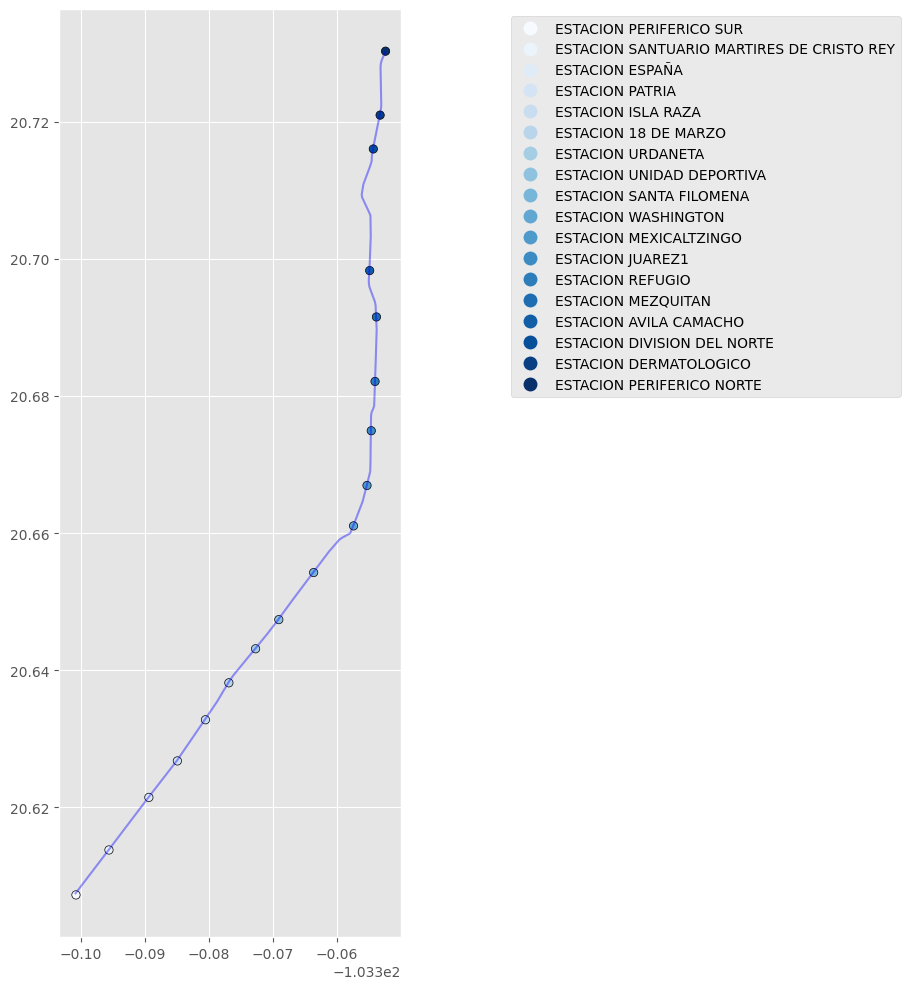

In [17]:
# Ahora sí grafiquemos

# Ahora sí grafiquemos
fig, ax = plt.subplots(figsize=(20, 10))

linea1.plot(color="blue", ax=ax, alpha=0.4)

nombre_estaciones = estaciones_l1["NOMBRE"].tolist()

estaciones_l1.plot(
    categorical=True,
    column="NOMBRE",
    categories=nombre_estaciones,
    cmap="Blues",
    edgecolor="black",
    legend_kwds={'bbox_to_anchor': (1.3, 1)},
    legend=True,
    ax=ax
)

fig.tight_layout()

¿Qué tal si de una graficamos todo?


In [18]:
list(lineas.keys())[0]

'c_tren_l1'

In [19]:
lineas

{'c_tren_l1':    OID_     Name     FolderPath  \
 0     0  Línea 1  SiteurLínea 1   
 
                                             geometry  
 0  LINESTRING Z (666639.364 2279504.599 0, 667183...  ,
 'c_tren_l2':    OID_     Name     FolderPath  \
 0     0  Línea 2  SiteurLínea 2   
 
                                             geometry  
 0  LINESTRING Z (671374.781 2287038.455 0, 671760...  ,
 'c_tren_l3':    Id             NOMBRE    ESTATUS   AÑO              Nombre1  \
 0   0  TRANSPORTE MASIVO  PROPUESTO  2015  Línea 3 Tren Ligero   
 
                Fuente                                           geometry  
 0  SEMOV, SITEUR 2015  LINESTRING (665029.941 2294916.802, 666220.569...  }

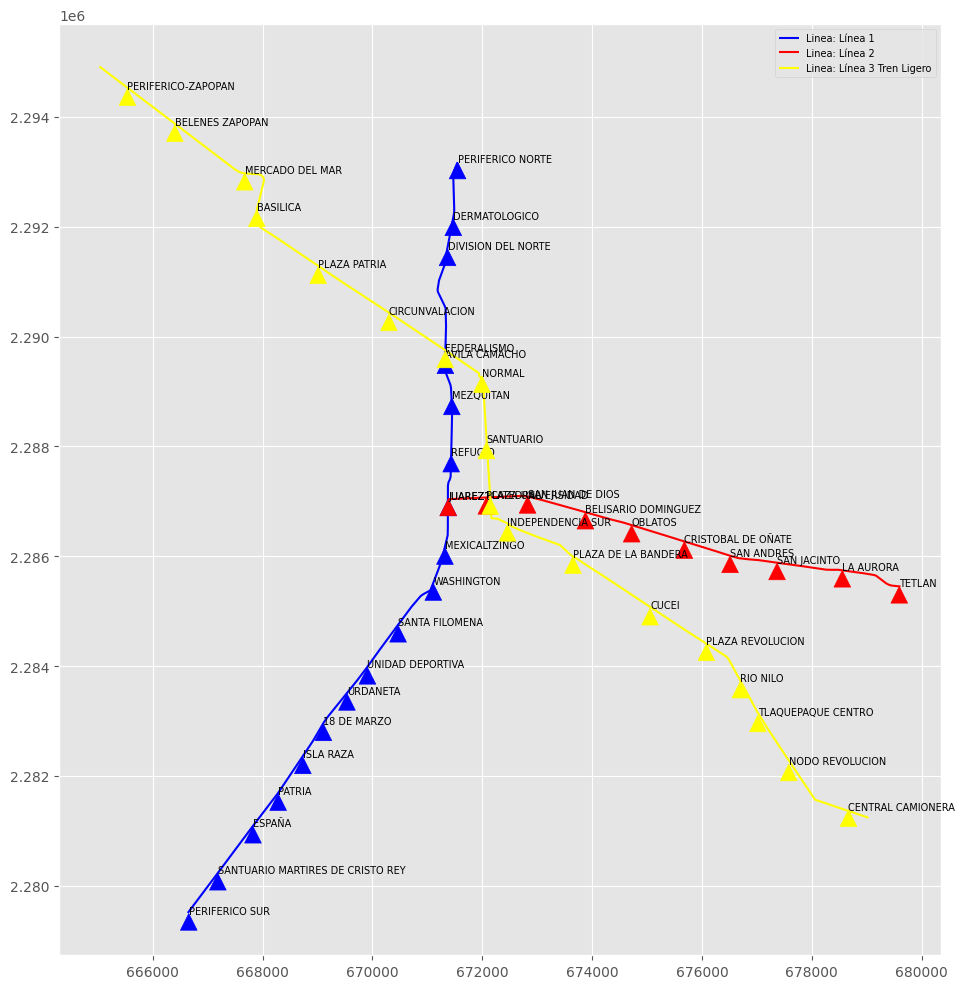

In [20]:
# Definiendo el espacio de graficado
fig, ax = plt.subplots(figsize=(30, 10))

# Constante para la fuente
fontsize = 7

# Diccionario de colores: Uno para cada línea
colors = {0: 'blue', 1: 'red', 2: 'yellow'}

for index in range(len(lineas)):
    linea_key = list(lineas.keys())[index]

    estacion_key = list(estaciones.keys())[index]
    # print(linea_key, estaciones_key)

    if "NOMBRE" in lineas[linea_key].columns:
        linea_col = "Nombre1"
    else:
        linea_col = "Name"

    if "NOMBRE" in estaciones[estacion_key].columns:
        estacion_col = "NOMBRE"
    else:
        estacion_col = "Name"


    linea_name = lineas[linea_key][linea_col].iloc[0]

    lineas[linea_key].plot(
        ax=ax, color=colors[index],
        label=f'Linea: {linea_name}'
    )

    points = estaciones[estacion_key].apply(
        lambda x: [y for y in x['geometry'].coords[0]], axis=1
    )

    for point_idx, point in enumerate(points):
        angle = 0
        x, y = point[0], point[1]

        estacion_name = estaciones[estacion_key].loc[point_idx, estacion_col]

        estacion_name = estacion_name.split('ESTACION')[1].strip()

        ax.annotate(
            estacion_name,
            (x,y),
            fontsize=fontsize, 
            rotation=angle,
            arrowprops=dict(color=colors[index])
        )


ax.legend(fontsize=fontsize)
fig.tight_layout()

## Leyendo shapefiles (.shp) : Caminos en el AMG (2012)


In [21]:
# Reciclamos la función, ahora para caminos
caminos = get_shp_files(supdir, 'camino_2012')

--> Initiating with .shp file reading over camino_2012 type of files.
--> Found file .shp: Camino_2012.
Done with file seek over camino_2012.


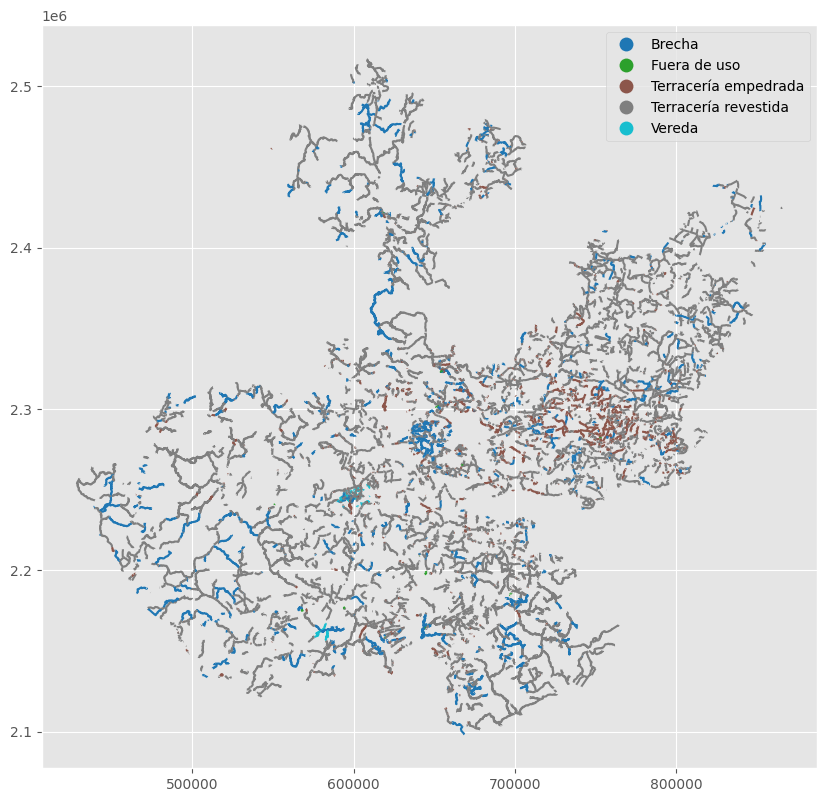

In [22]:
# Gráfica simple para esta magia

caminos['Camino_2012']

fig, ax = plt.subplots(figsize=(10, 10))
caminos['Camino_2012'].plot(
    categorical=True,
    column='TIPOIITEJ',
    legend=True,
    ax=ax
)

plt.show()

### Actividad autónoma

- Tome el archivo de colonias, lea y grafique coloreando por municipio.
  - El object type es `colonias`, estos files no tienen subcarpetas como los del tren.
- Sobre el archivo de colonias agregue lo ya hecho de líneas del tren ligero.
  - El objetivo de este punto es replicar la gráfica que ya existe de estaciones con nombres MÁS el plot de colonias.
  - Para que te sea más fácil pregúntate, ¿necesitas modificar algo del `for` para que esto funcione? Solo ten cuidado con que todo tenga el mismo `CRS` (El `CRS` indicado a utilizar es el `"EPSG:4326"`)
  - Recuerda que para modificar el `CRS` de algo que ya sea un mapa (o sea que ya cuente con un `CRS`) debes usar el `to_crs`.


In [23]:
colonias_path = os.path.join('colonias', 'Colonias.shp')

In [24]:
colonias = gpd.read_file(colonias_path)

In [25]:
colonias

,CP_COLONIA,MUNICIPIO,COLONIA,geometry
0,0.0,TLAQUEPAQUE,MIRADOR EL ALAMO,"POLYGON ((674657.966 2281812.001, 674792.992 2..."
1,0.0,TLAQUEPAQUE,SAN JUAN,"POLYGON ((681746.844 2277432.748, 681666.8 227..."
2,0.0,TONALA,LOMAS DEL CAMICHIN,"POLYGON ((679310.525 2283544.309, 679341.021 2..."
3,0.0,TONALA,LOMAS DE LA SOLEDAD,"POLYGON ((680259.801 2283805.944, 680275.186 2..."
4,0.0,TONALA,LOMAS DEL MANANTIAL,"POLYGON ((680635.522 2282294.889, 680630.678 2..."
...,...,...,...,...
1145,0.0,ZAPOPAN,PUERTAS DEL SOL,"POLYGON ((662865.084 2289120.666, 662916.047 2..."
1146,0.0,ZAPOPAN,VILLAS MEDITERRÁNEO,"POLYGON ((662782.699 2288648.636, 662732.717 2..."
1147,0.0,ZAPOPAN,SANTANDER,"POLYGON ((662827.926 2288628.733, 662782.699 2..."
1148,45117.0,ZAPOPAN,PARQUE LA CASTELLANA,"POLYGON ((662901.21 2288590.377, 662827.926 22..."


In [26]:
colonias = colonias.to_crs("EPSG:4326")

C:\Users\TAJ\AppData\Local\Temp\ipykernel_8136\3649590247.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


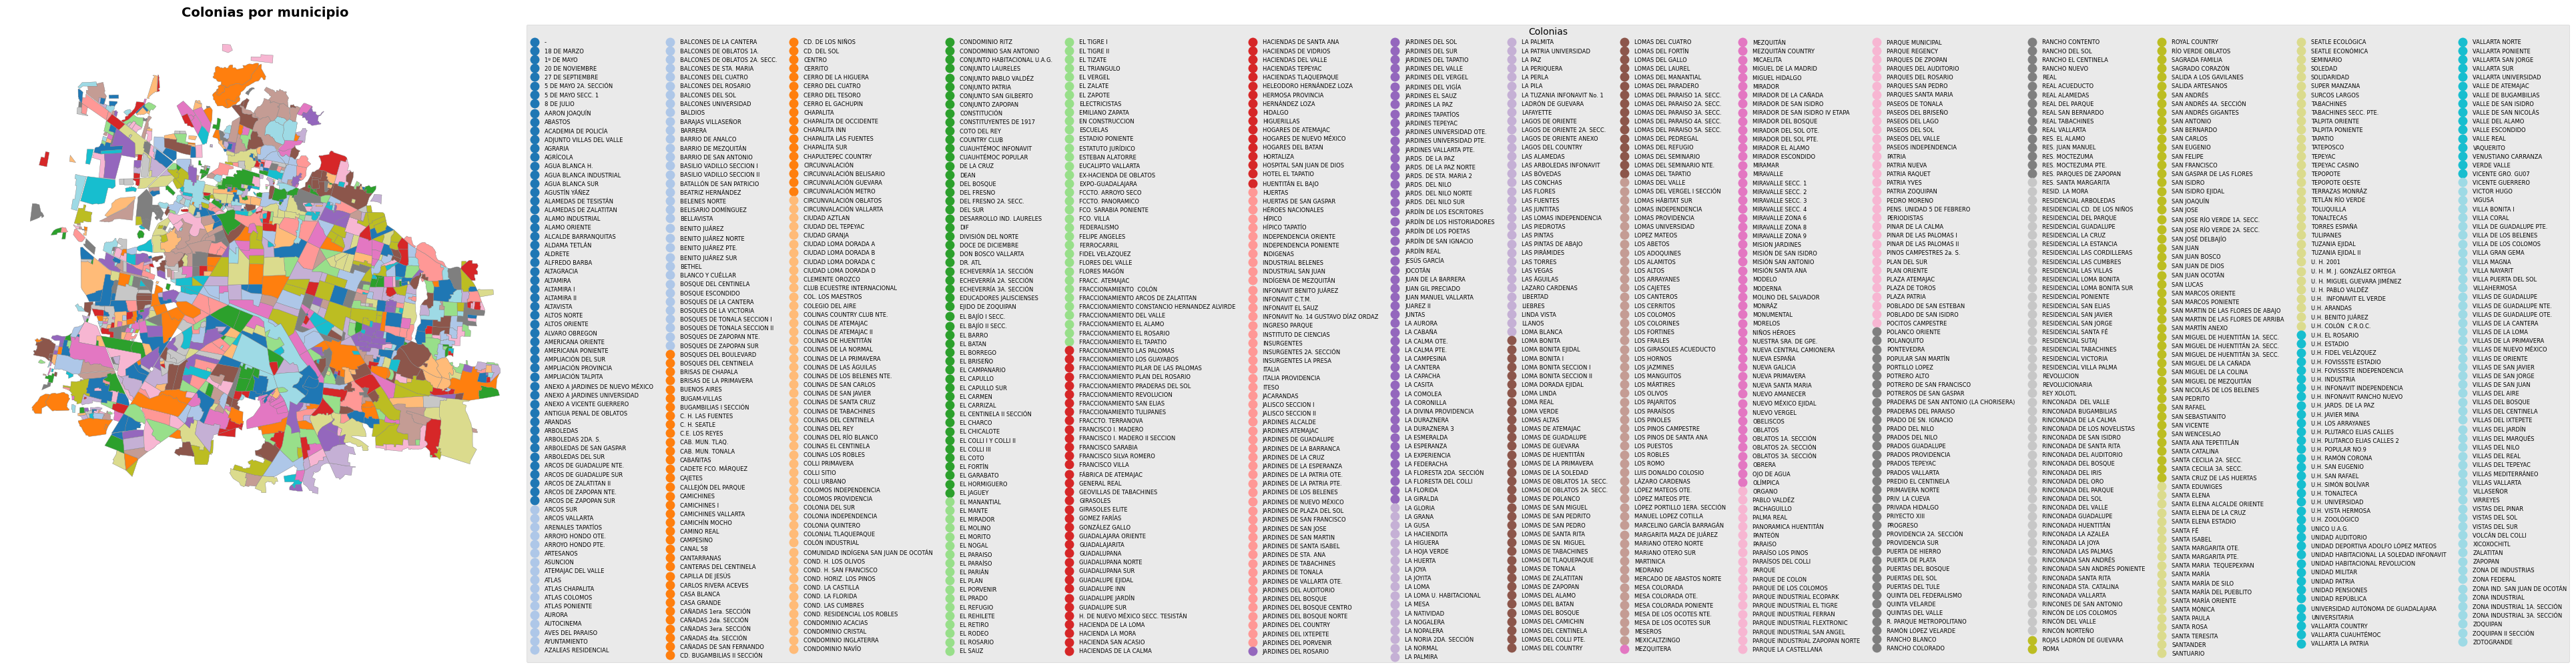

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))

colonias.plot(
    ax=ax,
    column='COLONIA',          
    categorical=True,
    legend=True,
    cmap='tab20',
    edgecolor='gray',
    linewidth=0.3,
    legend_kwds={
        'loc': 'upper left',           
        'bbox_to_anchor': (1, 1),      
        'ncol': 15,                     
        'fontsize': 6,                  
        'frameon': True,                
        'title': 'Colonias'             
    }
)

ax.set_title("Colonias por municipio", fontsize=14, weight='bold')
ax.set_axis_off()

plt.tight_layout()
plt.show()

In [30]:
from matplotlib import patheffects

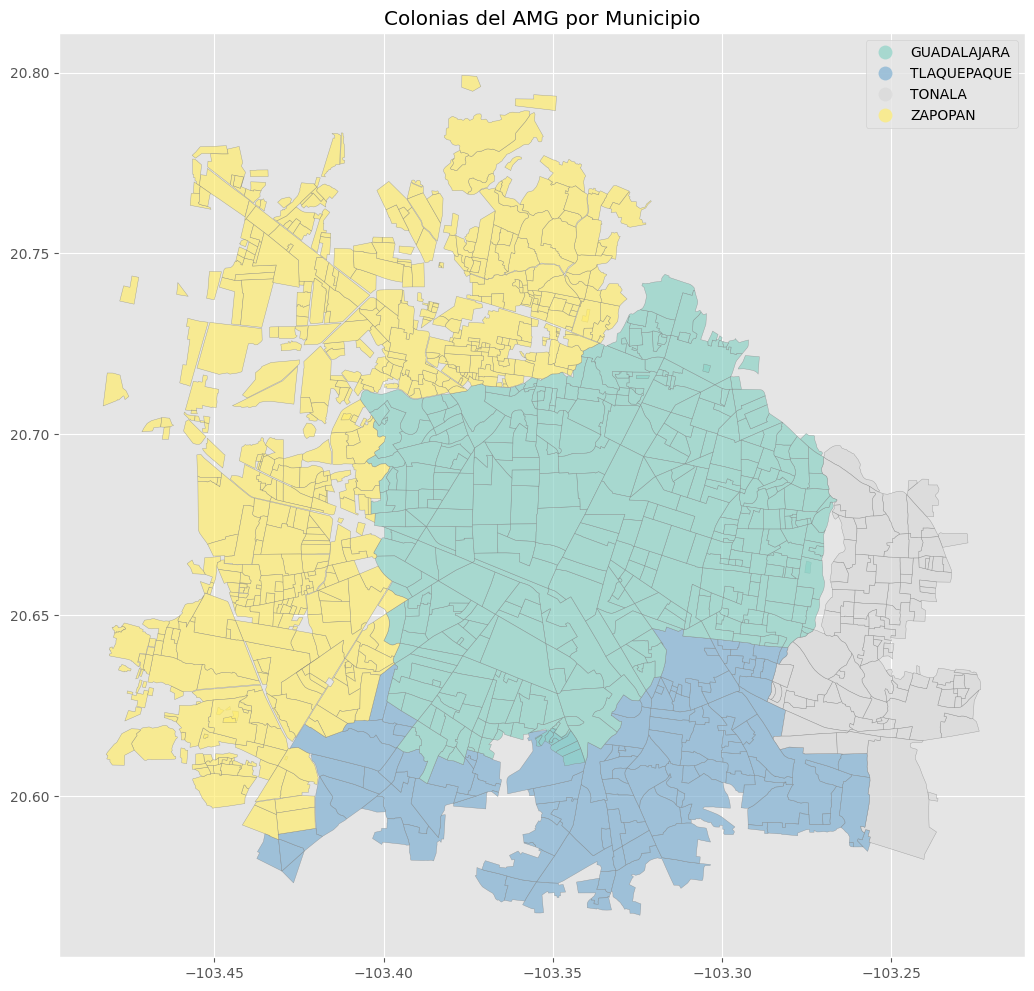

In [32]:
fig, ax = plt.subplots(figsize=(14, 12))

colonias.plot(
    ax=ax,
    column='MUNICIPIO',      
    categorical=True,
    cmap='Set3',
    alpha=0.7,
    edgecolor='gray',
    linewidth=0.3,
    legend=True
)

ax.set_title('Colonias del AMG por Municipio')
plt.show()

In [34]:
lineas

{'c_tren_l1':    OID_     Name     FolderPath  \
 0     0  Línea 1  SiteurLínea 1   
 
                                             geometry  
 0  LINESTRING Z (666639.364 2279504.599 0, 667183...  ,
 'c_tren_l2':    OID_     Name     FolderPath  \
 0     0  Línea 2  SiteurLínea 2   
 
                                             geometry  
 0  LINESTRING Z (671374.781 2287038.455 0, 671760...  ,
 'c_tren_l3':    Id             NOMBRE    ESTATUS   AÑO              Nombre1  \
 0   0  TRANSPORTE MASIVO  PROPUESTO  2015  Línea 3 Tren Ligero   
 
                Fuente                                           geometry  
 0  SEMOV, SITEUR 2015  LINESTRING (665029.941 2294916.802, 666220.569...  }

In [35]:
estaciones

{'c_est_tren_l1':     Id                                     NOMBRE      Detalle  \
 0    0                    ESTACION PERIFERICO SUR   Superficie   
 1    0  ESTACION SANTUARIO MARTIRES DE CRISTO REY   Superficie   
 2    0                            ESTACION ESPAÑA   Superficie   
 3    0                            ESTACION PATRIA   Superficie   
 4    0                         ESTACION ISLA RAZA   Superficie   
 5    0                       ESTACION 18 DE MARZO   Superficie   
 6    0                          ESTACION URDANETA   Superficie   
 7    0                  ESTACION UNIDAD DEPORTIVA   Superficie   
 8    0                    ESTACION SANTA FILOMENA   Superficie   
 9    0                        ESTACION WASHINGTON  Subterranea   
 10   0                     ESTACION MEXICALTZINGO  Subterranea   
 11   0                           ESTACION JUAREZ1  Subterranea   
 12   0                           ESTACION REFUGIO  Subterranea   
 13   0                         ESTACION MEZQ

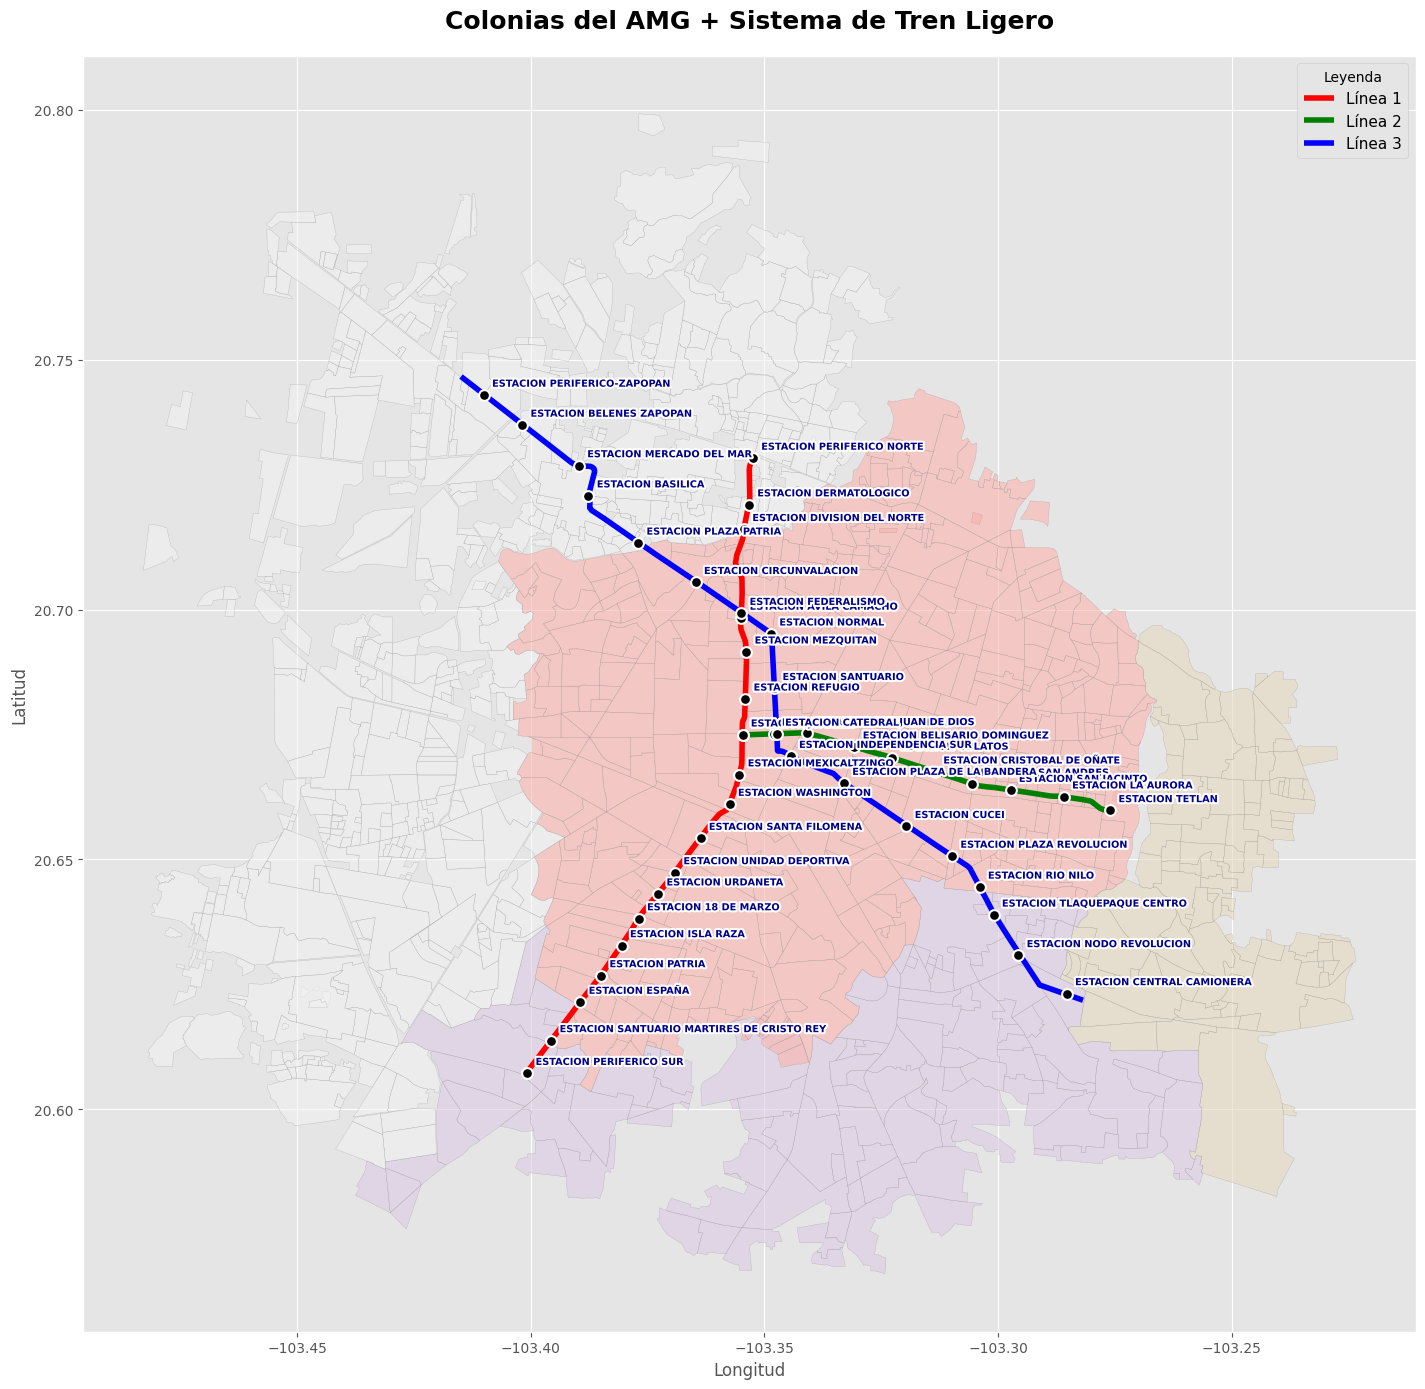

In [41]:
from matplotlib import patheffects
import matplotlib.pyplot as plt

colonias = colonias.to_crs("EPSG:4326")
for key in lineas.keys():
    lineas[key] = lineas[key].to_crs("EPSG:4326")
for key in estaciones.keys():
    estaciones[key] = estaciones[key].to_crs("EPSG:4326")

fig, ax = plt.subplots(figsize=(16, 14))

colonias.plot(
    ax=ax,
    column='MUNICIPIO',
    categorical=True,
    cmap='Pastel1',
    alpha=0.6,
    edgecolor='gray',
    linewidth=0.2,
    legend=True,
    legend_kwds={'loc': 'upper left', 'fontsize': 9}
)


line_colors = {
    'c_tren_l1': 'red',
    'c_tren_l2': 'green',
    'c_tren_l3': 'blue'
}


for key, gdf in lineas.items():
    color = line_colors.get(key, 'black') 
    gdf.plot(
        ax=ax, 
        linewidth=4,              
        color=color,              
        label=f'Línea {key[-1]}', 
        zorder=3                  
    )

def find_name_column(gdf):
    possible_names = ['NOMBRE', 'Name', 'name', 'Nombre']
    for col_name in possible_names:
        if col_name in gdf.columns:
            return col_name
    return None

for key, gdf in estaciones.items():
    gdf.plot(
        ax=ax, 
        color='black', 
        markersize=60,
        edgecolor='white',
        linewidth=1.5,
        zorder=4
    )
    
    name_col = find_name_column(gdf)
    if name_col:
        for idx, row in gdf.iterrows():
            ax.annotate(
                row[name_col],
                xy=(row.geometry.x, row.geometry.y),
                xytext=(6, 6),
                textcoords="offset points",
                fontsize=7,
                color='darkblue',
                weight='bold',
                path_effects=[patheffects.withStroke(linewidth=3, foreground='white')],
                zorder=5 
            )

ax.set_title('Colonias del AMG + Sistema de Tren Ligero', fontsize=18, weight='bold', pad=20)
ax.set_xlabel('Longitud', fontsize=12)
ax.set_ylabel('Latitud', fontsize=12)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
    handles, 
    labels, 
    loc='upper right',
    fontsize=11,
    title='Leyenda',
    framealpha=0.9
)

plt.tight_layout()
plt.show()